Urban Data Science & Smart Cities <br>
URSP688Y <br>
Instructor: Chester Harvey <br>
Urban Studies & Planning <br>
National Center for Smart Growth <br>
University of Maryland

[<img src="https://colab.research.google.com/assets/colab-badge.svg">](https://colab.research.google.com/github/ncsg/ursp688y_sp2024/blob/main/exercises/exercise07/exercise07.ipynb)

# Exercise 7

## Problem

In week 7, you learned how to extend tabular data with geospatial information: points, linestrings, and polygons.

For this next exercise, please ask a planning-related question with a spatial component, then find data and apply any data science methods you have learned so-far (or can Google!) to answer that question.

## Data

You are welcome to use any data you would like, including data used in previous demos and exercises.

## A Few Pointers
- Choose a straightforward question that requires a reasonable amount of data! Don't shoot for the moon. This exercise is intended to give you a chance to practice finding and analyzing spatial data, not to address the world's greatest challenges.
- Consider using this exercise to get a head start on your final project or explore options for it. Your project doesn't need to focus on spatial analysis for it to play a role. Are there datasets you might join together based on spatial locations?
- Don't go overboard. If you're hitting a wall with coding, write pseudocode and turn that in. Don't let the perfect be the enemy of the done. But if you're energized and having fun by chasing down a thorny solution to a coding problem, by all means feel free to keep at it!



1. Determine coordinates of each Silver Line Station in the study group
2. Link CSV files to match census tracts with latituted and longitude coordinates
3. Identify which census blocks are within the half mile radius of a metro station.
4. Use ACS Data to determine the transit mode share of each census tract within a half mile of the station
5. Make sure that there is a pre Silver Line and post silver line comparison, so 2010 vs 2019 for the 1st segment, and 2013 and 2023 for the second segment.

For Exercise 7, I wanted to build buffers around the Metrorail stations in Fairfax, Virginia to see what kind of land use patterns I could find. I was able to find data from Fairfax County that showed every housing unit in the county, and I wanted to use some of python's power to sift through all the housing types to see what kind of housing actually exists within 0.5 miles of the metro stations.

I also wanted to try to match those housing types with census tracts, so eventually I can use ACS data to determine demographic features and patterns/traits of people who are living in those areas. However, my python skills are not really up to the task for what I wanted to do, so for this week's exercise, I worked on my process in arcGIS Pro to make sure I have the necessary geospatial data for what I want to do in python while I learn to actually use python to get to the same results. I attached an image of what I would eventually like my python maps to look like below.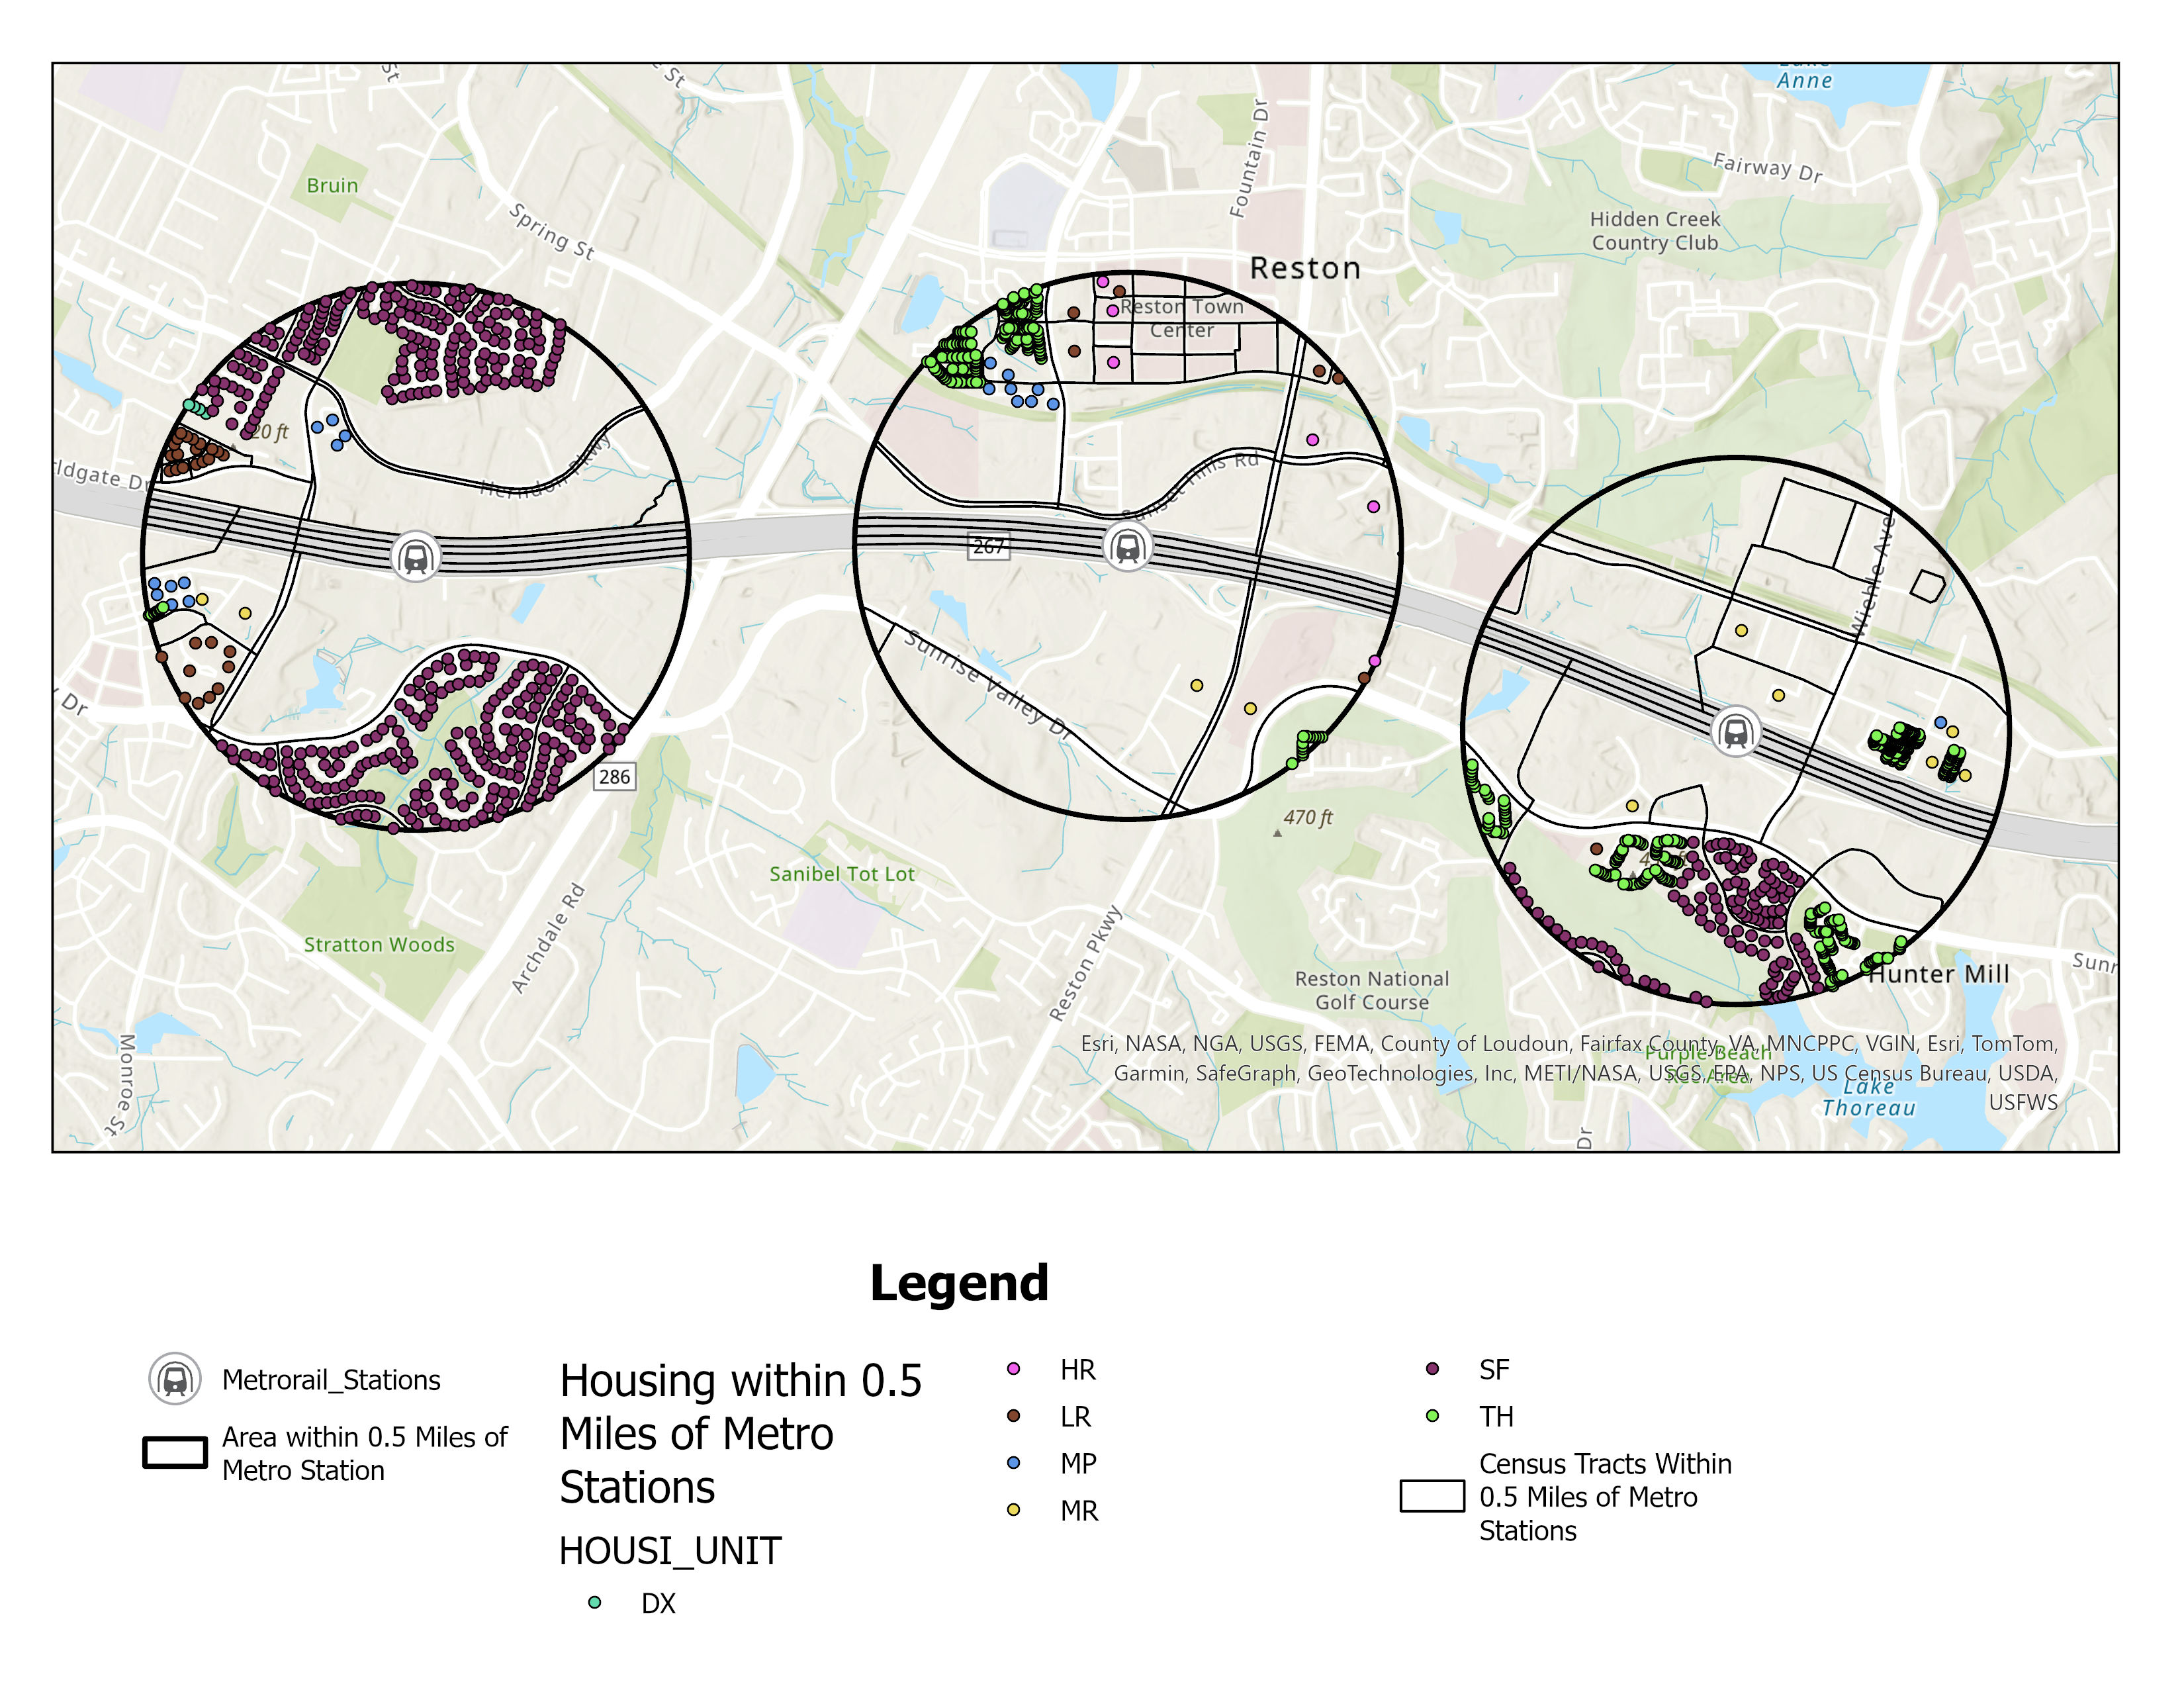

As you can see, the different types of housing are color coded, and sorted into separate census tracts. Within the data set that Fairfax County provides, I will be able to sort the housing structures by number of units to come up with a useful distribution of housing totals and types. The housing data I found was only from 2023 however, so for me to do a full comparison, I will need to find older data.

Otherwise, for my final project, I will use the current housing data to indicate what the current state of housing is, while only having a time comparison available with American Community Survey data. I will also need to find a similar housing data file for Loudoun County in order to reach the Loudoun Gateway, Dulles Airport, and Ashburn Stations. I will also need to dedicate more time to better understanding how to store and show geographical data in python to actually track the changes in ACS data and hopefully draw insightful conclusions from it.

In [ ]:
import os
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from geopy.distance import distance
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Set the working directory
# You will need to change this to your own folder on Google Drive
os.chdir('/content/drive/MyDrive/ursp688y/Exercise7')

In [ ]:
Station_Coordinates = {
    'McLean': [{38.92464,-77.21044,'Phase 1'}],
    'Tysons': [{38.92070,-77.22237,'Phase 1'}],
    'Greensboro': [{38.92076,-77.23370,'Phase 1'}],
    'Spring Hill': [{38.92944,-77.24212,'Phase 1'}],
    'Wiehle-Reston East': [{38.94785,-77.33997,'Phase 1'}],
    'Reston Town Center': [{38.95274,-77.36040,'Phase 2'}],
    'Herndon': [{38.95302,-77.38508,'Phase 2'}],
    'Innovation Center': [{38.96078,-77.41541,'Phase 2'}],
    'Washington Dulles International Airport': [{38.95584,-77.44819,'Phase 2'}],
    'Loudoun Gateway': [{38.99192,-77.46081,'Phase 2'}],
    'Ashburn': [{39.00532,-77.49172,'Phase 2'}],
}

In [ ]:
station_coordinates_df = pd.read_csv("station_info.csv")
print(station_coordinates_df)


In [ ]:
crs = gdf.crs

In [ ]:
geoms = gpd.points_from_xy(station_coordinates_df['Longitude'], station_coordinates_df['Latitude'])
geoms

<GeometryArray>
[ <POINT (-77.21 38.925)>, <POINT (-77.222 38.921)>, <POINT (-77.234 38.921)>,
 <POINT (-77.242 38.929)>,  <POINT (-77.34 38.948)>,  <POINT (-77.36 38.953)>,
 <POINT (-77.385 38.953)>, <POINT (-77.415 38.961)>, <POINT (-77.448 38.956)>,
 <POINT (-77.461 38.992)>, <POINT (-77.492 39.005)>]
Length: 11, dtype: geometry

In [ ]:
gpd.points_from_xy(station_coordinates_df['Latitude'], station_coordinates_df['Longitude'], crs=crs).crs

In [ ]:
gdf = gpd.GeoDataFrame(station_coordinates_df,geometry=geoms, crs=crs)

In [ ]:
gdf.plot()

In [ ]:
gdf.crs

In [ ]:
adjuster = 1/68
buffer_distance = adjuster
gdf['buffer'] = gdf['geometry'].buffer(buffer_distance)

<Axes: >

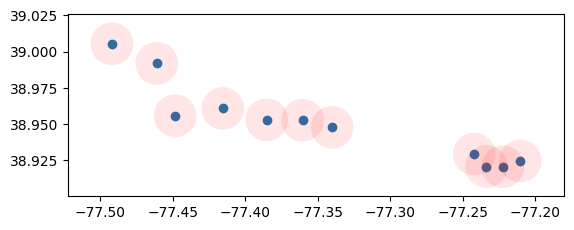

In [ ]:
ax = gdf.plot()
gdf['buffer'].plot(ax=ax, color='red', alpha=0.1)

In [ ]:
gdf = gpd.read_file('census_tracts.shp')